# k-Nearest Neighborhood Algorithm 실습
# 1. 데이터, 모듈 불러오기 및 kNN 피팅 방법
- 함수 불러오기

In [1]:
from sklearn import neighbors, datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

- 모델 구축

In [5]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X,y)

KNeighborsClassifier()

In [7]:
y_pred = clf.predict(X)

In [9]:
from sklearn.metrics import confusion_matrix

In [12]:
confusion_matrix(y,y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]], dtype=int64)

# 2.Cross-validation을 활용한 최적의 k찾기

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
k_range = range(1, 100)
k_scores = []

for k in k_range:
  knn = neighbors.KNeighborsClassifier(k)
  scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
  k_scores.append(scores.mean())
  

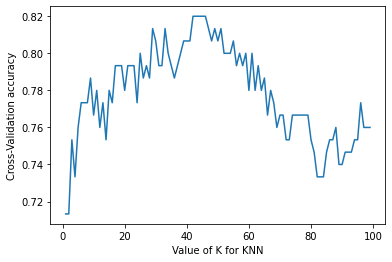

In [15]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel("Cross-Validation accuracy")
plt.show()

# 2.Weight를 준 kNN

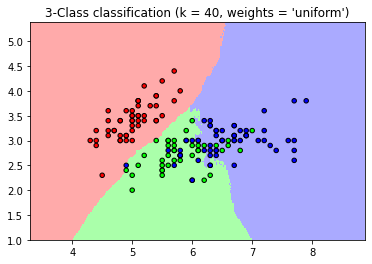

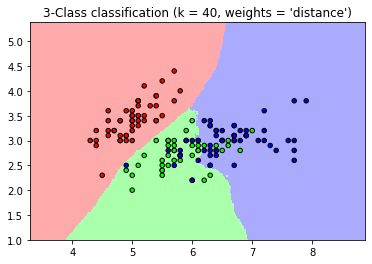

In [31]:
n_neighbors = 40
h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weight in ['uniform', 'distance']:
  clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weight)
  clf.fit(X,y)

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weight))

plt.show()


In [54]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40,1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

In [55]:
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)

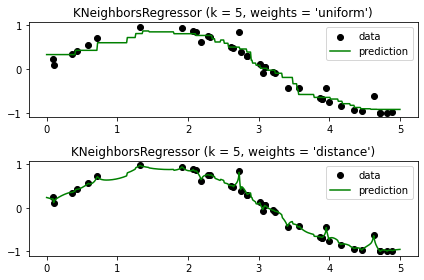

In [56]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()